<a href="https://colab.research.google.com/github/johnRogers-py/GenAI/blob/main/Copy_of_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 👀 Multilayer perceptron (MLP)

In this notebook, we'll walk through the steps required to train your own multilayer perceptron on the CIFAR dataset

In [25]:
# John Rogers
# Generative AI
# Submissions Date: 9/26/2024
# Assignment 2 Problem MLP

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
#from notebooks.utils import display

## 0. Parameters <a name="parameters"></a>

In [3]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [5]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [6]:
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## 2. Build the model <a name="build"></a>

In [22]:
def create_mlp_model(input_shape):
    input_layer = layers.Input((32, 32, 3))

  #Initalize Sequential Model
    model = models.Sequential()
    #Add input layer to the model
    model.add(layers.Input(input_shape))
    #Flatten the input tensor to a 1D tensor
    model.add(layers.Flatten())
    #Add fully connected layer with 200 units and ReLU activation
    model.add(layers.Dense(200, activation='relu'))
    #Add a dropout layer with a dropout rate of 0.3 to prevent overfitting
    model.add(layers.Dropout(0.3))
    #Add fully connected layer with 150 units and ReLU activation
    model.add(layers.Dense(150, activation='relu'))
    #Add a dropout layer with a dropout rate of 0.3 to prevent overfitting
    model.add(layers.Dropout(0.3))
    #Add fully connected layer with 100 units and ReLU activation
    model.add(layers.Dense(100, activation='relu'))
    #Add a dropout layer with a dropout rate of 0.3 to prevent overfitting
    model.add(layers.Dropout(0.3))
    #Add fully connected layer with 50 units and ReLU activation
    model.add(layers.Dense(50, activation='relu'))
    #Add a dropout layer with a dropout rate of 0.3 to prevent overfitting
    model.add(layers.Dropout(0.3))
    #Add fully connected layer with 10 units and ReLU activation
    model.add(layers.Dense(10, activation='relu'))
    #Print summary of the Model
    model.summary()
    return model

## 3. Train the model <a name="train"></a>

In [23]:
model = create_mlp_model(input_shape=(32, 32, 3))
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 200)                 │         614,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 150)                 │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 665,410 (2.54 MB)

 Trainable params: 665,410 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(x_train, y_train, batch_size=32, epochs=11, validation_split=0.2, shuffle=True)

Epoch 1/11
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.1008 - loss: 3.6589 - val_accuracy: 0.1035 - val_loss: 2.3033
Epoch 2/11
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.0978 - loss: 2.3480 - val_accuracy: 0.1367 - val_loss: 2.2979
Epoch 3/11
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.1071 - loss: 2.3133 - val_accuracy: 0.1706 - val_loss: 2.1469
Epoch 4/11
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.1612 - loss: 2.2253 - val_accuracy: 0.1878 - val_loss: 2.1007
Epoch 5/11
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.1694 - loss: 2.1827 - val_accuracy: 0.1909 - val_loss: 2.0700
Epoch 6/11
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.1764 - loss: 2.1381 - val_accuracy: 0.2274 - val_loss: 2.0555
Epoch 7/11
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.1902 - loss: 2.1065 - val_accuracy: 0.2292 - val_loss: 2.0408
Epoch 8/11
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.2103 -

## 4. Evaluation <a name="evaluate"></a>

In [12]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0969 - loss: 9.1163


[9.037805557250977, 0.0982000008225441]

In [13]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


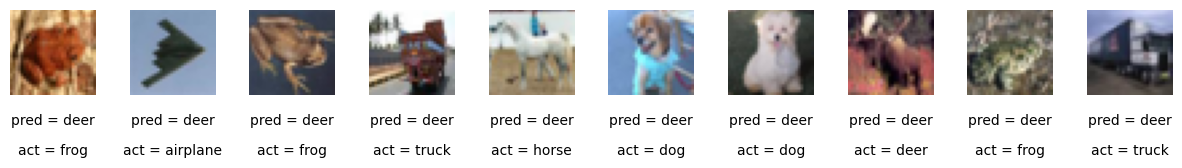

In [14]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)